# Phase-space file (PHSP)

Use the output of the following simulation:
- Folder: linac/
- Already computed results in folder output_ref/


In [1]:
# Tell Jupyter to plot figure right in the page
%matplotlib widget

# Module with plot capabilities
import matplotlib.pyplot as plt

# Module with scientific computing functions (matrix/vector)
import numpy as np                

# Module to read root files
import uproot

# Modules with reading/write folder/file functions
import os
from pathlib import Path

In [2]:
# The following command display the current working directory (where jupyter has been launched)
cwd = os.getcwd()
print('The Current Working Directory (CWD) is: \n', cwd)

The Current Working Directory (CWD) is: 
 /home/vgate/WORK/geant4course/SSFM/GATE_exercises/3_linac


In [3]:
# read a PHSP
root_filename = Path('./output_ref/output-PhS-g.root')
try:
    f = uproot.open(root_filename)
except Exception:
    print("File '"+root_filename+"' cannot be opened, not root file ?")
    exit()

# Look for a single key named "PhaseSpace"
k = f.keys()
try:
    psf = f['PhaseSpace']
except Exception:
    print("This root file is not a PhaseSpace, keys are: ", f.keys())
    exit()
    psf = f['PhaseSpace']
# now, the variable psf contains a root Tree with various branches: Energy, X, Y, Z etc
print('Read PHSP object', psf)
print("PhaseSpace keys: ", psf.keys())
# all branches are set in the variable 'a'
a = psf.arrays()

Read PHSP object <TTree 'PhaseSpace' (11 branches) at 0x7f6c0ece6920>
PhaseSpace keys:  ['Ekine', 'Weight', 'X', 'Y', 'Z', 'dX', 'dY', 'dZ', 'TrackID', 'EventID', 'RunID']


[0.496, 0.268, 3.9, 0.657, 0.619, 1.91, ..., 2.05, 1.05, 0.997, 2.16, 1.98]


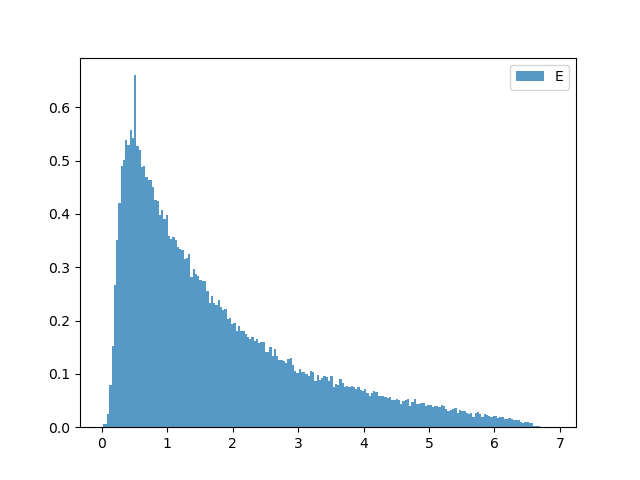

In [4]:
# Plot the E
nbs = 200
x = a['Ekine']
fig1, ax1 = plt.subplots()
print(x)
n, bins, patches = ax1.hist(x, nbs, density=True, alpha=0.75, label='E')
ax1.legend()

Number of elements:  109619


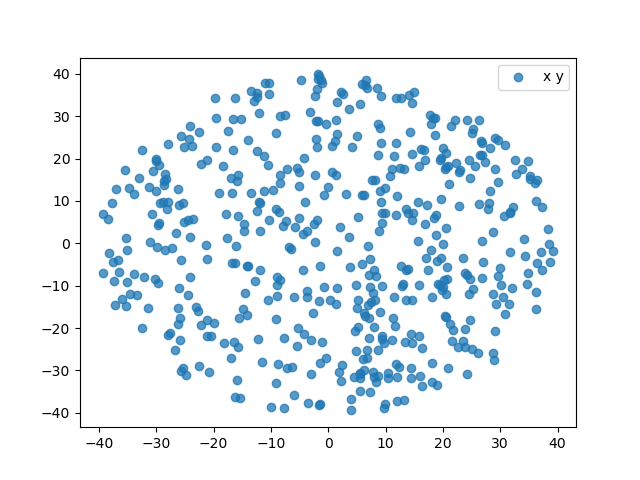

In [5]:
# Plot the X,Y 
nbs = 200
x = a['X']
y = a['Y']
print('Number of elements: ', len(x))
# only keep 500 first elements 
n = 500
x = x[:n]
y = y[:n]
fig2, ax2 = plt.subplots()
ax2.scatter(x, y, alpha=0.75, label='x y')
ax2.legend()

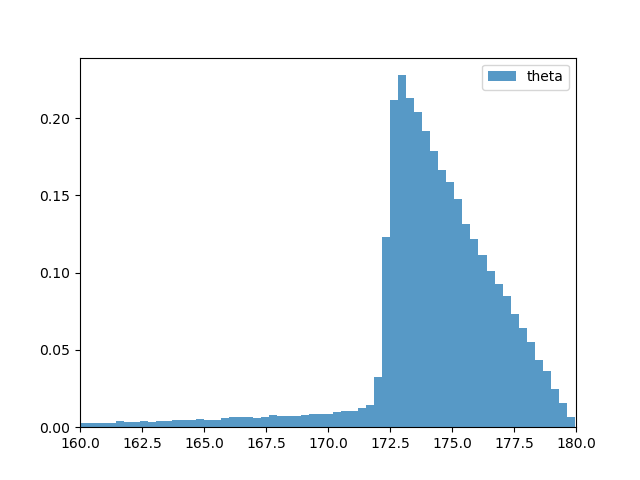

In [6]:
# Plot the theta angle (main direction dZ
nbs = 500
x = np.rad2deg(np.arccos(a['dZ']))
fig3, ax3 = plt.subplots()
n, bins, patches = ax3.hist(x, nbs, density=True, alpha=0.75, label='theta')
ax3.set_xlim(160,180)
ax3.legend()

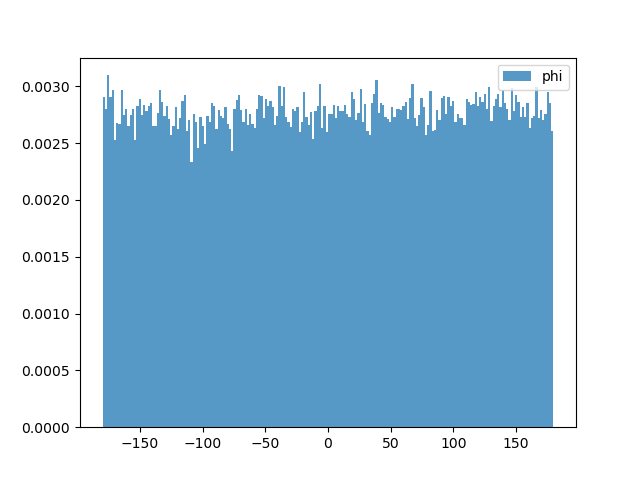

In [7]:
# Plot the phi angle
nbs = 200
x = np.rad2deg(np.arctan2(a['dY'], a['dX']))
fig4, ax4 = plt.subplots()
n, bins, patches = ax4.hist(x, nbs, density=True, alpha=0.75, label='phi')
ax4.legend()